In [2]:
import numpy as np
import datetime
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

2024-08-02 17:05:43.554105: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 17:05:43.760146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 17:05:43.858835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 17:05:43.881664: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-02 17:05:44.023318: I tensorflow/core/platform/cpu_feature_guar

In [3]:
import torch

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd9269c2b60>>
Traceback (most recent call last):
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


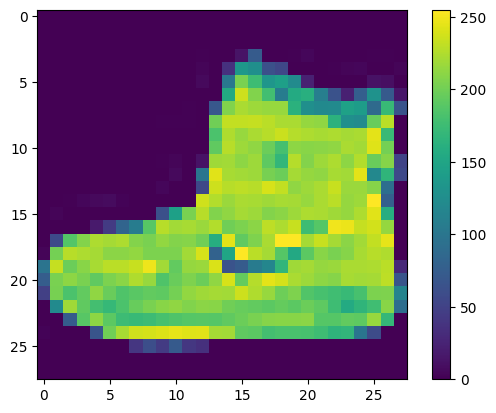

In [4]:
(data_train, class_train), (data_test, class_test) = fashion_mnist.load_data()

plt.figure()
plt.imshow(data_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
data_train = data_train / 255.0
data_test = data_test / 255.0

In [6]:
data_train = data_train.reshape(-1,28*28)
data_test = data_test.reshape(-1,28*28)

In [7]:
# setando semente aleatória
np.random.seed(123)
torch.manual_seed(123)

In [8]:
type(data_train)

numpy.ndarray

In [9]:
data_train_treinamento = torch.tensor(np.array(data_train), dtype=torch.float)
class_train_treinamento = torch.tensor(np.array(class_train), dtype = torch.long)

In [10]:
type(data_train_treinamento)
data_train_treinamento.shape
#class_train_treinamento.shape

torch.Size([60000, 784])

In [12]:
dataset = torch.utils.data.TensorDataset(data_train_treinamento, class_train_treinamento)

In [13]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [14]:
import torch.nn as nn

In [53]:
# 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
# linear quer dizer densa 
classificador = nn.Sequential(
    nn.Linear(in_features=784, out_features=256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
    nn.Sigmoid()
)

In [55]:
criterion = nn.CrossEntropyLoss()

In [56]:
# lr = learning hate
# weight decay : para decair aos poucos para conseguir chegar no mínimo
optimizer = torch.optim.SGD(classificador.parameters(), lr=0.01, momentum=0.9)

In [57]:
for epoch in range(30):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad() #zera o gradiente para nao acumular

    outputs = classificador(inputs) # classificador.forward(inputs) - previsoes
    #print(outputs)
    loss = criterion(outputs, labels) #calculo do erro das previsioes
    #print(loss)
    loss.backward() # backpropagation 
    optimizer.step() # para voltar atualizando os pesos

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 1.75821
Época   2: perda 1.68121
Época   3: perda 1.66992
Época   4: perda 1.65252
Época   5: perda 1.61993
Época   6: perda 1.61500
Época   7: perda 1.60950
Época   8: perda 1.60670
Época   9: perda 1.60408
Época  10: perda 1.59793
Época  11: perda 1.59572
Época  12: perda 1.59298
Época  13: perda 1.57917
Época  14: perda 1.57796
Época  15: perda 1.56364
Época  16: perda 1.55034
Época  17: perda 1.54927
Época  18: perda 1.54851
Época  19: perda 1.54767
Época  20: perda 1.54630
Época  21: perda 1.54546
Época  22: perda 1.54699
Época  23: perda 1.54724
Época  24: perda 1.54431
Época  25: perda 1.54437
Época  26: perda 1.54300
Época  27: perda 1.54386
Época  28: perda 1.54439
Época  29: perda 1.54387
Época  30: perda 1.54238


In [58]:
classificador.eval()

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=10, bias=True)
  (7): Sigmoid()
)

Taxa de acerto: 0.8236


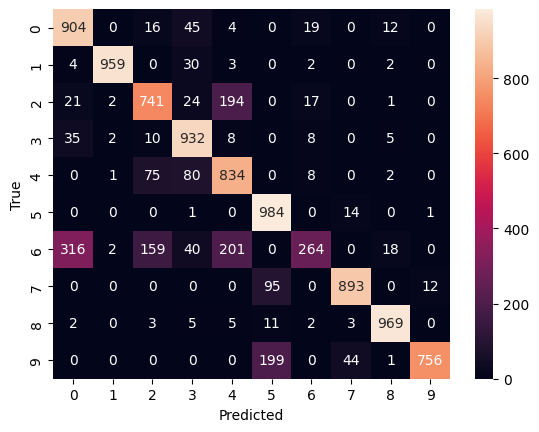

In [59]:
# Avaliação do modelo
data_test_treinamento = torch.tensor(data_test, dtype=torch.float)
class_test_treinamento = torch.tensor(class_test, dtype=torch.long)
test_dataset = torch.utils.data.TensorDataset(data_test_treinamento, class_test_treinamento)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = classificador(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calcular a taxa de acerto e a matriz de confusão
accuracy = accuracy_score(all_labels, all_preds)
print(f"Taxa de acerto: {accuracy}")
matriz = confusion_matrix(all_labels, all_preds)
sns.heatmap(matriz, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()